# Analisis keterkaitan desa digital dengan sinyal serta provider pada desa tersebut 

## Kelompok 6
1. Imam Chalish Rafidhul Haque (2207260)
2. Rakha Dhifiargo Hariadi (2209489)
3. Salma Ghaida (2207186)
4. Themy Sabri Syuhada (2203903)

In [144]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [145]:
df1 = pd.read_excel("D:\\codinglucu\\Semester3\\DMW\\EDA\\provider.xlsx")
df1.head(5)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota_kemendagri,nama_kabupaten_kota_kemendagri,bps_kode_kecamatan,bps_nama_kecamatan,bps_kode_desa,bps_nama_desa,kemendagri_kode_kecamatan,...,keberadaan_internet,kepemilikan_internet,ketersediaan_tower_bts,jarak_tower_terdekat,keberadaan_telkomsel,keberadaan_indosat,keberadaan_xl_axiata,keberadaan_operator_lain,operator_lainnya,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3.201190e+09,WANAHERANG,32.01.02,...,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,TRI,2021
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3.201190e+09,BOJONG KULUR,32.01.02,...,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,TRI,2021
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3.201190e+09,CIANGSANA,32.01.02,...,ADA,ADA,ADA,200.0,ADA,ADA,ADA,ADA,TRI,2021
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3.201190e+09,GUNUNG PUTRI,32.01.02,...,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,"TRI, AXIS, SMARTFREN",2021
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,3201190,GUNUNG PUTRI,3.201190e+09,BOJONG NANGKA,32.01.02,...,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,"TELKOMSEL, XL, IM3, INDOSAT, AXIS",2021


In [146]:
df3 = pd.read_excel("D:\\codinglucu\\Semester3\\DMW\\EDA\\jumlah_desa.xlsx")
df3.head(5)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_desa,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,416,DESA,2020
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,381,DESA,2020
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,354,DESA,2020
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,270,DESA,2020
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,421,DESA,2020


In [147]:
df2 = pd.read_excel("D:\\codinglucu\\Semester3\\DMW\\EDA\\desa_digital.xlsx")
df2.head(5)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_desa,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0,DESA,2021
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,15,DESA,2021
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,17,DESA,2021
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,3,DESA,2021
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,2,DESA,2021


# Explanatory Data Analysis
Pada tugas kali ini kami melakukan pre-processing data, transformasi data, mengubah tipe data, mengatasi data yang tidak masuk akal, dan
melakukan penghapusan pada kolom/atribut yang memiliki nilai redundan. 

Kami menggunakan 2 dataset untuk EDA kali ini. 

### Penjelasan Dataset Daftar Desa Berdasarkan Provider Telepon Seluler di Jawa Barat
Dataset ini berisi data daftar desa berdasarkan provider telepon seluler di Provinsi Jawa Barat periode tahun 2021.

Penjelasan mengenai variabel di dalam dataset ini:
*   kode_provinsi: menyatakan kode Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik.
*   nama_provinsi: menyatakan lingkup data berasal dari wilayah Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks.
*   kode_kabupaten_kota: menyatakan kode dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik.
*   nama_kabupaten_kota: menyatakan lingkup data berasal dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai penamaan BPS  merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks.
*   bps_kode_kecamatan: menyatakan kode dari setiap kecamatan di Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik.
*   bps_nama_kecamatan: menyatakan lingkup data berasal dari setiap kecamatan di Provinsi Jawa Barat sesuai penamaan BPS  merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks.
*   bps_kode_desa_kelurahan: menyatakan kode dari setiap desa dan kelurahan di Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik.
*   bps_nama_desa_kelurahan: menyatakan lingkup data berasal dari setiap desa dan kelurahan di Provinsi Jawa Barat sesuai penamaan BPS  merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks.
*   kemendagri_kode_kecamatan: menyatakan kode dari setiap kecamatan di Provinsi Jawa Barat sesuai ketentuan Kementerian Dalam Negeri merujuk pada aturan Peraturan Menteri Dalam Negeri No. 137 tahun 2017 dengan tipe data numerik.
*   kemendagri_nama_kecamatan: menyatakan lingkup data berasal dari setiap kecamatan di Provinsi Jawa Barat sesuai penamaan Kementerian Dalam Negeri merujuk pada aturan Peraturan Menteri Dalam Negeri No. 137 tahun 2017 dengan tipe data teks.
*   kemendagri_kode_desa_kelurahan: menyatakan kode dari setiap desa dan kelurahan di Provinsi Jawa Barat sesuai ketentuan Kementerian Dalam Negeri merujuk pada aturan Peraturan Menteri Dalam Negeri No. 137 tahun 2017 dengan tipe data numerik.
*   kemendagri_nama_desa_kelurahan: menyatakan lingkup data berasal dari setiap desa dan kelurahan di Provinsi Jawa Barat sesuai penamaan Kementerian Dalam Negeri merujuk pada aturan Peraturan Menteri Dalam Negeri No. 137 tahun 2017 dengan tipe data teks.
*   status_sinyal: menyatakan kategori status sinyal dengan tipe data teks.
    *   sinyal kuat: menyatakan status sinyal kuat.
    *   sinyal lemah: menyatakan status sinyal kuat.
    *   tidak ada sinyal: menyatakan status sinyal kuat.
*   keberadaan_internet: menyatakan status keberadaan internet  dengan tipe data teks.
     *   ada: menyatakan adanya keberadaan internet di desa.
     *   tidak ada: menyatakan tidak adanya keberadaan internet di desa.
*   kepemilikan_internet: menyatakan status kepemilikan internet  dengan tipe data teks.
     *   ada: menyatakan adanya kepemilikan internet di desa.
     *   tidak ada: menyatakan tidak adanya kepemilikan internet di desa.
*   ketersediaan_tower_bts: menyatakan status ketersediaan tower bts  dengan tipe data teks.
     *   ada: menyatakan adanya ketersediaan tower bts di desa.
     *   tidak ada: menyatakan tidak adanya ketersediaan tower bts di desa.
*   jarak_tower_terdekat: menyatakan jarak tower terdekat dalam kilometer dengan tipe data numerik.
*   keberadaan_telkomsel: menyatakan status keberadaan sinyal telkomsel di desa dengan tipe data teks.
     *   ada: menyatakan adanya sinyal telkomsel di desa
     *   tidak ada: menyatakan tidak adanya sinyal telkomsel di desa.
*   keberadaan_indosat: menyatakan status keberadaan sinyal indosat di desa dengan tipe data teks.
     *   ada: menyatakan adanya sinyal indosat di desa
     *   tidak ada: menyatakan tidak adanya sinyal indosat di desa.
*   keberadaan_xl_axiata: menyatakan status keberadaan sinyal xl axiata di desa dengan tipe data teks.
     *   ada: menyatakan adanya sinyal xl axiata di desa
     *   tidak ada: menyatakan tidak adanya sinyal xl axiata di desa.
*   keberadaan_operator_lain: menyatakan status keberadaan sinyal operator lainnya di desa dengan tipe data teks.
     *   ada: menyatakan adanya sinyal sinyal operator lainnya di desa
     *   tidak ada: menyatakan tidak adanya sinyal sinyal operator lainnya di desa.
*   operator_lainnya: menyatakan status keberadaan sinyal operator lainnya di desa diantaranya axis, three, smartfren, by.u, indihome, lainnya dengan tipe data teks.
*   tahun: menyatakan tahun produksi data dengan tipe data numerik.

### Penjelasan Dataset Jumlah Kawasan Desa Digital Berdasarkan Kabupaten/Kota di Jawa Barat
Dataset ini berisi data jumlah kawasan desa digital berdasarkan kabupaten/kota di Provinsi Jawa Barat dari tahun 2021 s.d. 2022. 

Desa digital adalah sebuah konsep pengembangan desa di Jawa Barat yang menggunakan teknologi informasi dan komunikasi. Tujuannya untuk mempercepat pertumbuhan ekonomi, meningkatkan kualitas hidup masyarakat, dan memperkuat pemerintahan desa informasi dan wilayah.

Penjelasan mengenai variabel di dalam dataset ini: 

* kode_provinsi: menyatakan kode Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik.
* nama_provinsi: menyatakan lingkup data berasal dari wilayah Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks.
* kode_kabupaten_kota: menyatakan kode dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik.
* nama_kabupaten_kota: menyatakan lingkup data berasal dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai penamaan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks.
* jumlah_desa: menyatakan jumlah kawasan desa digital dengan tipe data numerik.
* satuan: menyatakan satuan dari pengukuran  jumlah kawasan desa digital dalam desa dengan tipe data teks.
* tahun: menyatakan tahun produksi data dengan tipe data numerik.


## Praproses data
Memperbaiki nama atribut di tabel desa digital
* mengubah nama atribut jumlah_desa menjadi jumlah_desa_digital

Transformasi data
* transformasi data pada atribut status_sinyal, awalnya SINYAL KUAT, SINYAL LEMAH, dan TIDAK ADA SINYAL menjadi KUAT, LEMAH, dan TIDAK ADA
* transformasi data pada atribut jarak_tower_terdekat yang awalnya memiliki satuan kilometer, menjadi meter

Mengubah tipe data atribut
* mengubah datatype atribut status_sinyal, keberadaan_internet, kepemilikan_internet, ketersediaan_tower_bts, keberadaan_telkomsel, keberadaan_indosat, keberadaan_xl_axiata, keberadaan_operator_lain menjadi category
* mengubah datatype atribut jarak_tower_terdekat menjadi integer

Mengatasi data yang tidak masuk akal
* data pada atribut keberadaan_operator_lain dengan atribut operator_lainnya tidak sesuai
* data pada atribut operator_lainnya yang 0 diganti dengan TIDAK ADA

Melakukan drop pada atribut
* atribut satuan di drop karena datanya hanya berisi DESA

### Membuat dataframe 1 baru untuk menampilkan kolom yang diperlukan

In [148]:
df1_baru = df1[["nama_kabupaten_kota_kemendagri", "bps_nama_desa","status_sinyal", "keberadaan_internet", "kepemilikan_internet", "ketersediaan_tower_bts", "jarak_tower_terdekat", "keberadaan_telkomsel", "keberadaan_indosat", "keberadaan_xl_axiata", "keberadaan_operator_lain", "operator_lainnya", "tahun"]]
df1_baru.head(5)

,nama_kabupaten_kota_kemendagri,bps_nama_desa,status_sinyal,keberadaan_internet,kepemilikan_internet,ketersediaan_tower_bts,jarak_tower_terdekat,keberadaan_telkomsel,keberadaan_indosat,keberadaan_xl_axiata,keberadaan_operator_lain,operator_lainnya,tahun
0,KABUPATEN BOGOR,WANAHERANG,SINYAL KUAT,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,TRI,2021
1,KABUPATEN BOGOR,BOJONG KULUR,SINYAL KUAT,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,TRI,2021
2,KABUPATEN BOGOR,CIANGSANA,SINYAL KUAT,ADA,ADA,ADA,200.0,ADA,ADA,ADA,ADA,TRI,2021
3,KABUPATEN BOGOR,GUNUNG PUTRI,SINYAL KUAT,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,"TRI, AXIS, SMARTFREN",2021
4,KABUPATEN BOGOR,BOJONG NANGKA,SINYAL KUAT,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,"TELKOMSEL, XL, IM3, INDOSAT, AXIS",2021


### Mengubah nama atribut pada tabel desa digital

In [149]:
df2.rename(columns = {'jumlah_desa':'jumlah_desa_digital'}, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   54 non-null     int64 
 1   kode_provinsi        54 non-null     int64 
 2   nama_provinsi        54 non-null     object
 3   kode_kabupaten_kota  54 non-null     int64 
 4   nama_kabupaten_kota  54 non-null     object
 5   jumlah_desa_digital  54 non-null     int64 
 6   satuan               54 non-null     object
 7   tahun                54 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 3.5+ KB


### Melakukan drop atribut satuan pada tabel desa digital

In [150]:
df2 = df2.drop(["satuan"], axis=1)
df2.head(5)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_desa_digital,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0,2021
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,15,2021
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,17,2021
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,3,2021
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,2,2021


### Melakukan drop atribut satuan pada tabel jumlah desa

In [151]:
df3 = df3.drop(["satuan"], axis=1)
df3.head(5)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_desa,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,416,2020
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,381,2020
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,354,2020
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,270,2020
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,421,2020


### Melakukan transformasi data pada atribut status_sinyal

In [152]:
df1_baru.loc[df1_baru['status_sinyal'] == 'SINYAL KUAT', 'status_sinyal'] = 'KUAT'
df1_baru.loc[df1_baru['status_sinyal'] == 'SINYAL LEMAH', 'status_sinyal'] = 'LEMAH'
df1_baru.loc[df1_baru['status_sinyal'] == 'TIDAK ADA SINYAL', 'status_sinyal'] = 'TIDAK ADA'
df1_baru.head(5)

,nama_kabupaten_kota_kemendagri,bps_nama_desa,status_sinyal,keberadaan_internet,kepemilikan_internet,ketersediaan_tower_bts,jarak_tower_terdekat,keberadaan_telkomsel,keberadaan_indosat,keberadaan_xl_axiata,keberadaan_operator_lain,operator_lainnya,tahun
0,KABUPATEN BOGOR,WANAHERANG,KUAT,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,TRI,2021
1,KABUPATEN BOGOR,BOJONG KULUR,KUAT,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,TRI,2021
2,KABUPATEN BOGOR,CIANGSANA,KUAT,ADA,ADA,ADA,200.0,ADA,ADA,ADA,ADA,TRI,2021
3,KABUPATEN BOGOR,GUNUNG PUTRI,KUAT,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,"TRI, AXIS, SMARTFREN",2021
4,KABUPATEN BOGOR,BOJONG NANGKA,KUAT,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,"TELKOMSEL, XL, IM3, INDOSAT, AXIS",2021


### Mengubah datatype beberapa atribut yang teks menjadi category

In [153]:
df1_baru = df1_baru.astype({'status_sinyal': "category", 'keberadaan_internet': "category", 'kepemilikan_internet': "category", 'ketersediaan_tower_bts': "category", 'keberadaan_telkomsel': "category", 'keberadaan_indosat': "category", 'keberadaan_xl_axiata': "category", 'keberadaan_operator_lain': "category"})
df1_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5312 entries, 0 to 5311
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   nama_kabupaten_kota_kemendagri  5312 non-null   object  
 1   bps_nama_desa                   5308 non-null   object  
 2   status_sinyal                   5312 non-null   category
 3   keberadaan_internet             5312 non-null   category
 4   kepemilikan_internet            5312 non-null   category
 5   ketersediaan_tower_bts          5312 non-null   category
 6   jarak_tower_terdekat            5312 non-null   float64 
 7   keberadaan_telkomsel            5312 non-null   category
 8   keberadaan_indosat              5312 non-null   category
 9   keberadaan_xl_axiata            5312 non-null   category
 10  keberadaan_operator_lain        5312 non-null   category
 11  operator_lainnya                5312 non-null   object  
 12  tahun               

### Mengatasi data yang tidak masuk akal pada atribut operator_lainnya dengan keberadaan_operator_lain serta melakukan transformasi data pada atribut operator_lainnya

In [154]:
df1_baru.loc[df1_baru['operator_lainnya'] == '0', 'operator_lainnya'] = 'TIDAK ADA'
df1_baru.loc[df1_baru['keberadaan_operator_lain'] == 'TIDAK ADA', 'operator_lainnya'] = 'TIDAK ADA'
df1_baru.head(5)

,nama_kabupaten_kota_kemendagri,bps_nama_desa,status_sinyal,keberadaan_internet,kepemilikan_internet,ketersediaan_tower_bts,jarak_tower_terdekat,keberadaan_telkomsel,keberadaan_indosat,keberadaan_xl_axiata,keberadaan_operator_lain,operator_lainnya,tahun
0,KABUPATEN BOGOR,WANAHERANG,KUAT,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,TRI,2021
1,KABUPATEN BOGOR,BOJONG KULUR,KUAT,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,TRI,2021
2,KABUPATEN BOGOR,CIANGSANA,KUAT,ADA,ADA,ADA,200.0,ADA,ADA,ADA,ADA,TRI,2021
3,KABUPATEN BOGOR,GUNUNG PUTRI,KUAT,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,"TRI, AXIS, SMARTFREN",2021
4,KABUPATEN BOGOR,BOJONG NANGKA,KUAT,ADA,ADA,ADA,1.0,ADA,ADA,ADA,ADA,"TELKOMSEL, XL, IM3, INDOSAT, AXIS",2021


### Mengubah satuan jarak di atribut jarak_tower_terdekat

In [155]:
df1_baru['jarak_tower_terdekat'] =  df1_baru['jarak_tower_terdekat'] * 1000
df1_baru.head(5)

,nama_kabupaten_kota_kemendagri,bps_nama_desa,status_sinyal,keberadaan_internet,kepemilikan_internet,ketersediaan_tower_bts,jarak_tower_terdekat,keberadaan_telkomsel,keberadaan_indosat,keberadaan_xl_axiata,keberadaan_operator_lain,operator_lainnya,tahun
0,KABUPATEN BOGOR,WANAHERANG,KUAT,ADA,ADA,ADA,1000.0,ADA,ADA,ADA,ADA,TRI,2021
1,KABUPATEN BOGOR,BOJONG KULUR,KUAT,ADA,ADA,ADA,1000.0,ADA,ADA,ADA,ADA,TRI,2021
2,KABUPATEN BOGOR,CIANGSANA,KUAT,ADA,ADA,ADA,200000.0,ADA,ADA,ADA,ADA,TRI,2021
3,KABUPATEN BOGOR,GUNUNG PUTRI,KUAT,ADA,ADA,ADA,1000.0,ADA,ADA,ADA,ADA,"TRI, AXIS, SMARTFREN",2021
4,KABUPATEN BOGOR,BOJONG NANGKA,KUAT,ADA,ADA,ADA,1000.0,ADA,ADA,ADA,ADA,"TELKOMSEL, XL, IM3, INDOSAT, AXIS",2021


### Mengubah datatype atribut jarak_tower_terdekat 

In [156]:
df1_baru = df1_baru.astype({'jarak_tower_terdekat': int})
df1_baru.head(5)

,nama_kabupaten_kota_kemendagri,bps_nama_desa,status_sinyal,keberadaan_internet,kepemilikan_internet,ketersediaan_tower_bts,jarak_tower_terdekat,keberadaan_telkomsel,keberadaan_indosat,keberadaan_xl_axiata,keberadaan_operator_lain,operator_lainnya,tahun
0,KABUPATEN BOGOR,WANAHERANG,KUAT,ADA,ADA,ADA,1000,ADA,ADA,ADA,ADA,TRI,2021
1,KABUPATEN BOGOR,BOJONG KULUR,KUAT,ADA,ADA,ADA,1000,ADA,ADA,ADA,ADA,TRI,2021
2,KABUPATEN BOGOR,CIANGSANA,KUAT,ADA,ADA,ADA,200000,ADA,ADA,ADA,ADA,TRI,2021
3,KABUPATEN BOGOR,GUNUNG PUTRI,KUAT,ADA,ADA,ADA,1000,ADA,ADA,ADA,ADA,"TRI, AXIS, SMARTFREN",2021
4,KABUPATEN BOGOR,BOJONG NANGKA,KUAT,ADA,ADA,ADA,1000,ADA,ADA,ADA,ADA,"TELKOMSEL, XL, IM3, INDOSAT, AXIS",2021


## Merge dataset jumlah desa dan desa digital

In [157]:
df2 = df2[df2['tahun'] == 2021] # hanya mengambil data yang tahun 2021
df3 = df3[df3['tahun'] == 2021] # hanya mengambil data yang tahun 2021
dfmerge = pd.merge(df2, df3, on = ["kode_provinsi", "nama_provinsi", "kode_kabupaten_kota", "nama_kabupaten_kota", "tahun"]) # melakukan merge
dfmerge = dfmerge.drop(["id_y"], axis=1) # drop id sebelah, karena adanya ketidak sesuaian id dari datasetnya, yang tabel pertama itu 2021-2022, sedangkan tabel kedua 2020-2021, sehingga terjadi miss atribut id
dfmerge.rename(columns = {'id_x':'id'}, inplace = True) # mengganti nama atribut id_x menjadi id agar lebih universal
dfmerge['persentase_desa_digital'] = (dfmerge['jumlah_desa_digital'] / dfmerge['jumlah_desa']) * 100 # lalu membuat atribut baru yang menyatakan persentase desa digital
dfmerge['persentase_desa_digital'].fillna(0, inplace= True) # mengubah semua nilai null pada atribut persentase_desa_digital menjadi 0
dfmerge[::]

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_desa_digital,tahun,jumlah_desa,persentase_desa_digital
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,0,2021,416,0.000000
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,15,2021,381,3.937008
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,17,2021,354,4.802260
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,3,2021,270,1.111111
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,2,2021,421,0.475059
5,6,32,JAWA BARAT,3206,KABUPATEN TASIKMALAYA,27,2021,351,7.692308
6,7,32,JAWA BARAT,3207,KABUPATEN CIAMIS,12,2021,258,4.651163
7,8,32,JAWA BARAT,3208,KABUPATEN KUNINGAN,8,2021,361,2.216066
8,9,32,JAWA BARAT,3209,KABUPATEN CIREBON,2,2021,412,0.485437
9,10,32,JAWA BARAT,3210,KABUPATEN MAJALENGKA,14,2021,330,4.242424


## Visualisasi data

### Menampilkan data persentase desa digital pada setiap kabupaten/kota

<Axes: xlabel='nama_kabupaten_kota'>

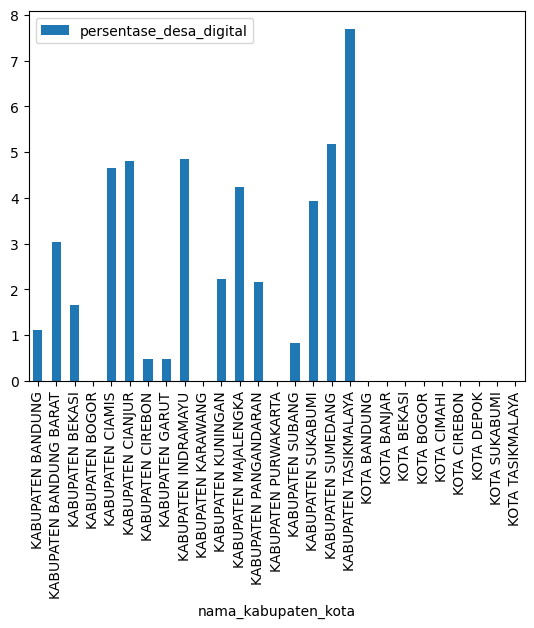

In [161]:
dfmerge_groups1 = dfmerge.groupby(['nama_kabupaten_kota'])[['persentase_desa_digital']].sum()
dfmerge_groups1.plot(kind='bar')
# Ini perlu diganti sumbu x nya jadi nama_kabupaten_kota terus perlu ada pembanding jumlah desa digital dan desa biasa dalam bentuk persentase

### Menampilkan gambaran desa-desa dengan status sinyalnya di tiap kabupaten/kota

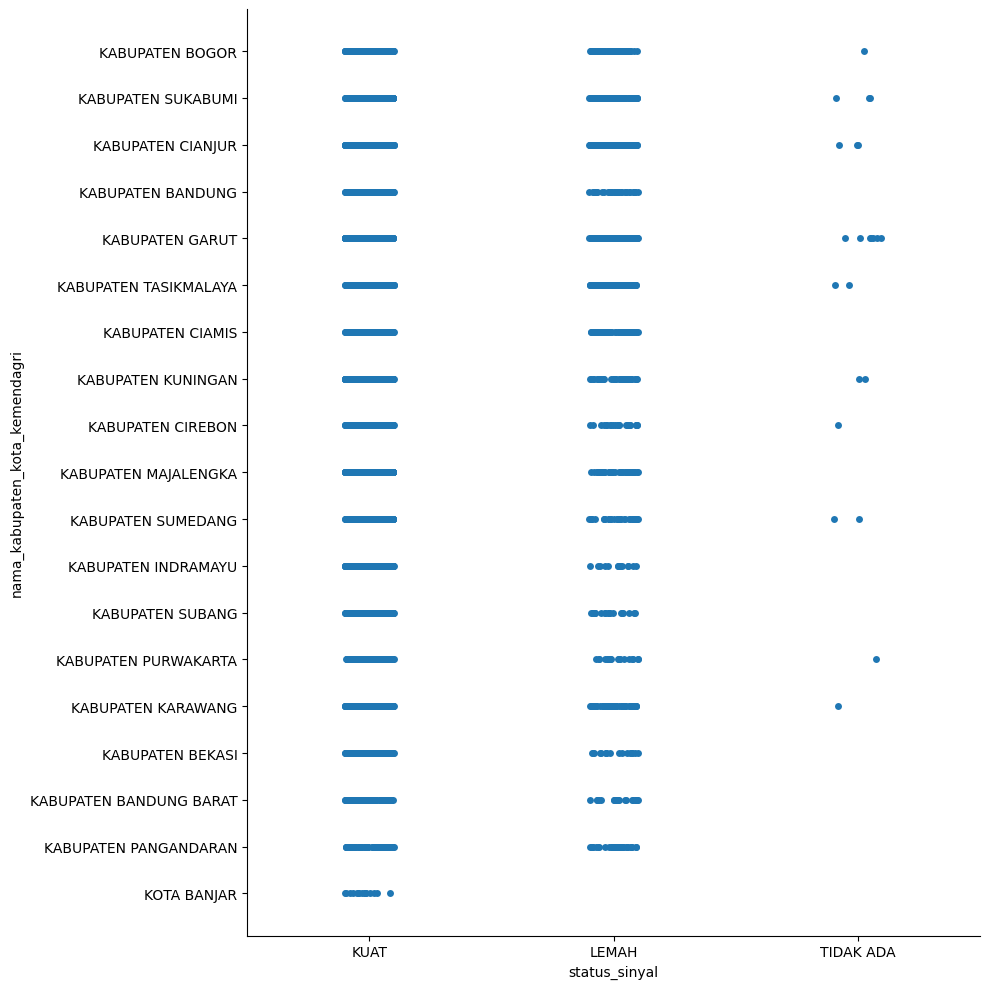

In [170]:
sns.catplot(x="status_sinyal", y="nama_kabupaten_kota_kemendagri", data=df1_baru, height=10)

## Kesimpulan
Kesimpulannya adalah bahwa status sinyal serta provider pada desa, tidak menjamin bahwa desa tersebut adalah desa digital. Dan ini juga dapat disimpulkan seberapa sedikitnya desa digital pada suatu kabupaten/kota, sehingga mungkin dapat ditingkatkan lagi desa digital di desa-desa yang memang sudah memadai dalam segi internet nya.